# 1. INTRODUCTION

=================================================

## Milestone 4 Inference

- Nama  : Bimantyo Arya Majid

Pada Bagian Inference akan dilakukan uji dengan data baru yang belum pernah dilihat model

=================================================

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 req

In [ ]:
# Import Library

import numpy as np # Untuk pengolahan data
import tensorflow as tf # Framework utama untuk deep learning, CNN, dan komputasi model neural network.
from tensorflow.keras.models import load_model # Melakukan Load model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import requests # Agar bisa menggunakan URL
from PIL import Image # Untuk membaca gambar
from io import BytesIO

# Check TensorFlow version
print(tf.__version__)

2.15.1


# 2. LOAD MODEL dan PREDICTION

In [6]:
# Proses Load Model
model = load_model("weather_classifier.keras")

In [5]:
# Definisikan urutan kelas {'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}
class_labels = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

In [7]:
# Fungsi untuk Preprocess gambar menyesuaikan dengan kebutuhan Transfer Learning
def preprocess_image(img, target_size=(224, 224)): # Target size dilakukan resize sesuai dengan kebutuhan Transfer Learning
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)  # Sesuai dengan EfficientNet
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [25]:
# Fungsi untuk memproses prediksi gambar berdasarkan url
def predict_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    processed_img = preprocess_image(img)
    preds = model.predict(processed_img)
    predicted_class = np.argmax(preds, axis=-1)[0]

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.show()

    print(f'Nilai probability prediksi kelas : {preds}')
    print(f'Hasil prediksi kelas gambar ini adalah: {class_labels[predicted_class]}')

    return

1/1 [==============================] - 0s 103ms/step


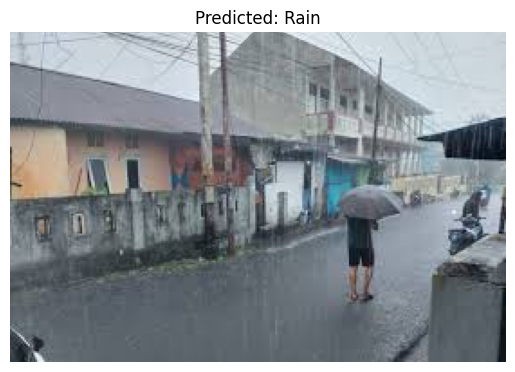

Nilai probability prediksi kelas : [[1.7745090e-01 8.1979740e-01 2.7151634e-03 3.6578527e-05]]
Hasil prediksi kelas gambar ini adalah: Rain


In [ ]:
# Prediksi menggunakan data dari URL
predict_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlDZIhwCHgSVM7K28nOcTsq44WogvyyZ5T3Q&s")

Berdasarkan hasil prediksi menggunakan gambar yang berasal dari URL, gambar tersebut diprediksi sebagai Rain